In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# from tensorflow.python import keras



## 샘플데이터 생성

In [7]:
x=np.array([1,3,4,6,10],dtype=np.float32)
y=np.array([0.5,1,2,1.8,3],dtype=np.float32)

## 케라스 모델 생성
- 자동 임의 weight 초기화
- h(x)=wx+b 구현
- 모델의 객체가 생성됨과 동시에 초기에는 임의의 값이 init_w,init_b에 저장되도록 한다
- unit=>레이어안에 존재하는 유닛갯수,input_shape=>input에 들어갈 값의 갯수(입력데이터 x , 레이어 생성과 동시에 Sequential에서는 b값이 존재한다고 판단),activation(어떻게 가지고 놀것인가?)

In [8]:
# 모델객체 생성과 동시에 w,b를 임의의 숫자로 초기화한다
model=keras.Sequential([layers.Dense(units=1,input_shape=[1],activation="linear")])
init_w,init_b=model.weights
print(init_w,init_b)

<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.65857255]], dtype=float32)> <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


## 코드 시각화(matplotlib.pyplot이용)
- 파란점이 실제 x,y데이터
- 빨간선이 기본값으로 만들어진 랜덤 모델

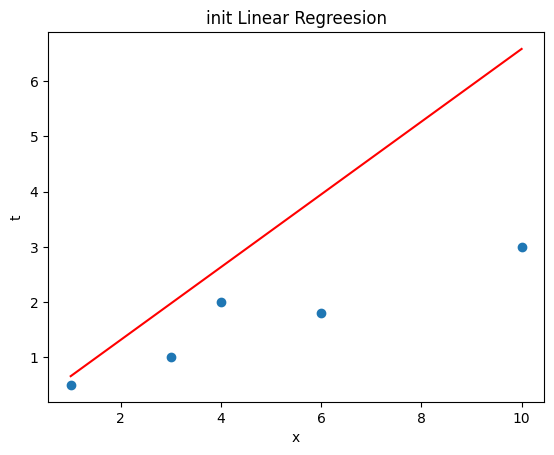

In [9]:
plt.scatter(x,y)
plt.plot(x,init_w[0][0]*x+init_b[0],color='red')
plt.xlabel('x')
plt.ylabel('t')
plt.title('init Linear Regreesion')
plt.show()

### h(x)=2x+1을 만족하는 식을 찾고 싶다면
- MSE를 비용함수로 설정 , Gradient Decent를 사용하여 모델 학습하여,적합한 w,b를 찾아낼 수 있다

Epoch 1/10
5/5 [==============================] - 0s 995us/step - loss: 3.2635
Epoch 2/10
5/5 [==============================] - 0s 566us/step - loss: 1.6479
Epoch 3/10
5/5 [==============================] - 0s 568us/step - loss: 0.8699
Epoch 4/10
5/5 [==============================] - 0s 639us/step - loss: 0.4955
Epoch 5/10
5/5 [==============================] - 0s 530us/step - loss: 0.3094
Epoch 6/10
5/5 [==============================] - 0s 694us/step - loss: 0.2192
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 0.1757
Epoch 8/10
5/5 [==============================] - 0s 715us/step - loss: 0.1552
Epoch 9/10
5/5 [==============================] - 0s 704us/step - loss: 0.1472
Epoch 10/10
5/5 [==============================] - 0s 466us/step - loss: 0.1423


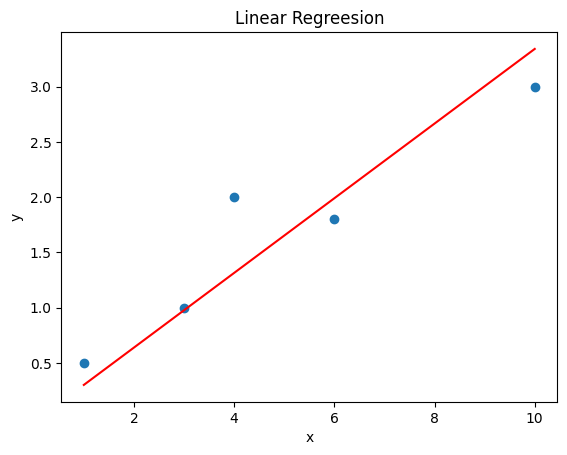

In [10]:
# 모델 컴파일 과정
# keras.optimizers.legacy.SGD 경사하강법 을 이용
# loss='mean_squared_error' 비용함수 최소제곱 오차 사용
sgd=keras.optimizers.legacy.SGD(learning_rate=0.001)# 경사하강법 learning_rate를 0.001로 설정
model.compile(optimizer=sgd,loss='mean_squared_error')# MSE를 비용함수로 설정
#학습 epochs=10 전체 데이터 돌리는 횟수
history=model.fit(x,y,batch_size=1,epochs=10)
#학습된 x,y
w,b=model.layers[0].get_weights()[0][0],model.layers[0].get_weights()[1][0]

plt.scatter(x,y)
plt.plot(x,w*x+b,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regreesion')
plt.show()